## Black Friday Dataset EDA and Feature Engineering
### Cleaning and preparing data for model training


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

## Problem Statement

A retail company “ABC Private Limited” wants to understand the customer purchase behaviour (specifically, purchase amount) against various products of different categories. They have shared purchase summary of various customers for selected high volume products from last month. The data set also contains customer demographics (age, gender, marital status, city_type, stay_in_current_city), product details (product_id and product category) and Total purchase_amount from last month.

Now, they want to build a model to predict the purchase amount of customer against various products which will help them to create personalized offer for customers against different products.

In [2]:
df=pd.read_csv('train.csv')
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


In [3]:
df1=pd.read_csv("test.csv")
df1.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0


In [4]:
df.shape

(550068, 12)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


In [6]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [7]:
df.isnull().sum()

User_ID                            0
Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
City_Category                      0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            173638
Product_Category_3            383247
Purchase                           0
dtype: int64

In [8]:
#merge train and test
# dff=df.append(df1)

dff=pd.merge(df, df1, how="outer")


dff.head()



,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [9]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     783667 non-null  int64  
 1   Product_ID                  783667 non-null  object 
 2   Gender                      783667 non-null  object 
 3   Age                         783667 non-null  object 
 4   Occupation                  783667 non-null  int64  
 5   City_Category               783667 non-null  object 
 6   Stay_In_Current_City_Years  783667 non-null  object 
 7   Marital_Status              783667 non-null  int64  
 8   Product_Category_1          783667 non-null  int64  
 9   Product_Category_2          537685 non-null  float64
 10  Product_Category_3          237858 non-null  float64
 11  Purchase                    550068 non-null  float64
dtypes: float64(3), int64(4), object(5)
memory usage: 77.7+ MB


In [10]:
dff.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,7.836670e+05,783667.000000,783667.000000,783667.000000,537685.000000,237858.000000,550068.000000
mean,1.003029e+06,8.079300,0.409777,5.366196,9.844506,12.668605,9263.968713
std,1.727267e+03,6.522206,0.491793,3.878160,5.089093,4.125510,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001519e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003075e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [11]:
dff.drop(['User_ID'], axis=1, inplace=True)

In [12]:
dff.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [13]:
dff['Gender']

0         F
1         F
2         F
3         F
4         M
         ..
783662    F
783663    F
783664    F
783665    F
783666    F
Name: Gender, Length: 783667, dtype: object

In [14]:
cat_fea=[i for i in dff.columns if dff[i].dtypes=='O']

In [15]:
dff[cat_fea].head()

,Product_ID,Gender,Age,City_Category,Stay_In_Current_City_Years
0,P00069042,F,0-17,A,2
1,P00248942,F,0-17,A,2
2,P00087842,F,0-17,A,2
3,P00085442,F,0-17,A,2
4,P00285442,M,55+,C,4+


In [16]:
num_fea=[i for i in dff.columns if df[i].dtypes!='O']

In [17]:
dff[num_fea].head()

,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,10,0,3,NaN,NaN,8370.0
1,10,0,1,6.0,14.0,15200.0
2,10,0,12,NaN,NaN,1422.0
3,10,0,12,14.0,NaN,1057.0
4,16,0,8,NaN,NaN,7969.0


In [18]:
# dff["Gender"]=dff["Gender"].map({'F':0 , 'M':1})
# dff.head()

In [19]:
dff["Gender"]=pd.get_dummies(dff["Gender"], drop_first=1)

In [20]:
dff.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,0-17,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,0-17,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,0-17,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,0-17,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,55+,16,C,4+,0,8,NaN,NaN,7969.0


In [21]:
dff['Age'].unique()

array(['0-17', '55+', '26-35', '46-50', '51-55', '36-45', '18-25'],
      dtype=object)

In [22]:
pd.get_dummies(dff["Age"], drop_first=True)

,18-25,26-35,36-45,46-50,51-55,55+
0,0,0,0,0,0,0
1,0,0,0,0,0,0
2,0,0,0,0,0,0
3,0,0,0,0,0,0
4,0,0,0,0,0,1
...,...,...,...,...,...,...
783662,0,1,0,0,0,0
783663,0,1,0,0,0,0
783664,0,1,0,0,0,0
783665,0,0,0,1,0,0


In [23]:
# dff['Age']=dff['Age'].map({'0-17':1, '18-25':2, '26-35':3, '36-45':4, '46-50':5, '51-55':6, '55+':7  })

In [26]:
dff.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [27]:

# Import label encoder
from sklearn import preprocessing
  
# label_encoder object knows how to understand word labels.
label_encoder = preprocessing.LabelEncoder()
  
# Encode labels in column 'species'.
df['Age']= label_encoder.fit_transform(df['Age'])
  
df['Age'].unique()

array([0, 6, 2, 4, 5, 3, 1], dtype=int64)

In [28]:
dff.head()

,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,A,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,A,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,A,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,A,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,C,4+,0,8,NaN,NaN,7969.0


In [32]:
dff_city=pd.get_dummies(dff["City_Category"], drop_first=True)
dff_city.head()

,B,C
0,0,0
1,0,0
2,0,0
3,0,0
4,0,1


In [33]:
df=pd.concat([dff, dff_city ], axis=1)

In [37]:
dff.drop('City_Category', axis=1, inplace=True)

In [38]:
dff

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,NaN,NaN,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0,12,NaN,NaN,1422.0
3,P00085442,0,1,10,2,0,12,14.0,NaN,1057.0
4,P00285442,1,7,16,4+,0,8,NaN,NaN,7969.0
...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4+,1,8,NaN,NaN,NaN
783663,P00254642,0,3,15,4+,1,5,8.0,NaN,NaN
783664,P00031842,0,3,15,4+,1,1,5.0,12.0,NaN
783665,P00124742,0,5,1,4+,0,10,16.0,NaN,NaN


In [39]:
dff.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2            245982
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [52]:
len(dff["Product_Category_2"].unique())

17

In [51]:
dff["Product_Category_2"].value_counts()

8.0     337299
14.0     78834
2.0      70498
16.0     61687
15.0     54114
5.0      37165
4.0      36705
6.0      23575
11.0     20230
17.0     19104
13.0     15054
9.0       8177
12.0      7801
10.0      4420
3.0       4123
18.0      4027
7.0        854
Name: Product_Category_2, dtype: int64

In [57]:
df["Product_Category_3"].mode()[0]

16.0

In [54]:
##Replace the missing value with mode
dff["Product_Category_2"]=dff["Product_Category_2"].fillna(dff["Product_Category_2"].mode()[0])

In [55]:
dff.isnull().sum()

Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3            545809
Purchase                      233599
dtype: int64

In [58]:
##Replace the missing value with mode
dff["Product_Category_3"]=dff["Product_Category_3"].fillna(dff["Product_Category_3"].mode()[0])

In [59]:
dff.isnull().sum()


Product_ID                         0
Gender                             0
Age                                0
Occupation                         0
Stay_In_Current_City_Years         0
Marital_Status                     0
Product_Category_1                 0
Product_Category_2                 0
Product_Category_3                 0
Purchase                      233599
dtype: int64

<AxesSubplot:>

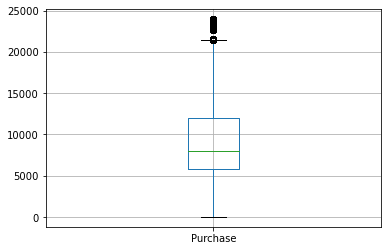

In [63]:
dff.boxplot(column='Purchase')

In [67]:
dff["Stay_In_Current_City_Years"]=dff["Stay_In_Current_City_Years"].str.replace('+','')

<ipython-input-67-aa390196d534>:1: FutureWarning: The default value of regex will change from True to False in a future version. In addition, single character regular expressions will *not* be treated as literal strings when regex=True.
  dff["Stay_In_Current_City_Years"]=dff["Stay_In_Current_City_Years"].str.replace('+','')


In [68]:
dff

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,NaN
783663,P00254642,0,3,15,4,1,5,8.0,16.0,NaN
783664,P00031842,0,3,15,4,1,1,5.0,12.0,NaN
783665,P00124742,0,5,1,4,0,10,16.0,16.0,NaN


In [79]:
#Convert Object into integer
# for i in dff["Stay_In_Current_City_Years"]:
#     i=int(i)\

dff["Stay_In_Current_City_Years"]=dff["Stay_In_Current_City_Years"].astype(int)
dff['Gender']=dff["Gender"].astype(int)

In [80]:
dff.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 783667 entries, 0 to 783666
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   Product_ID                  783667 non-null  object 
 1   Gender                      783667 non-null  int32  
 2   Age                         783667 non-null  int64  
 3   Occupation                  783667 non-null  int64  
 4   Stay_In_Current_City_Years  783667 non-null  int32  
 5   Marital_Status              783667 non-null  int64  
 6   Product_Category_1          783667 non-null  int64  
 7   Product_Category_2          783667 non-null  float64
 8   Product_Category_3          783667 non-null  float64
 9   Purchase                    550068 non-null  float64
dtypes: float64(3), int32(2), int64(4), object(1)
memory usage: 59.8+ MB


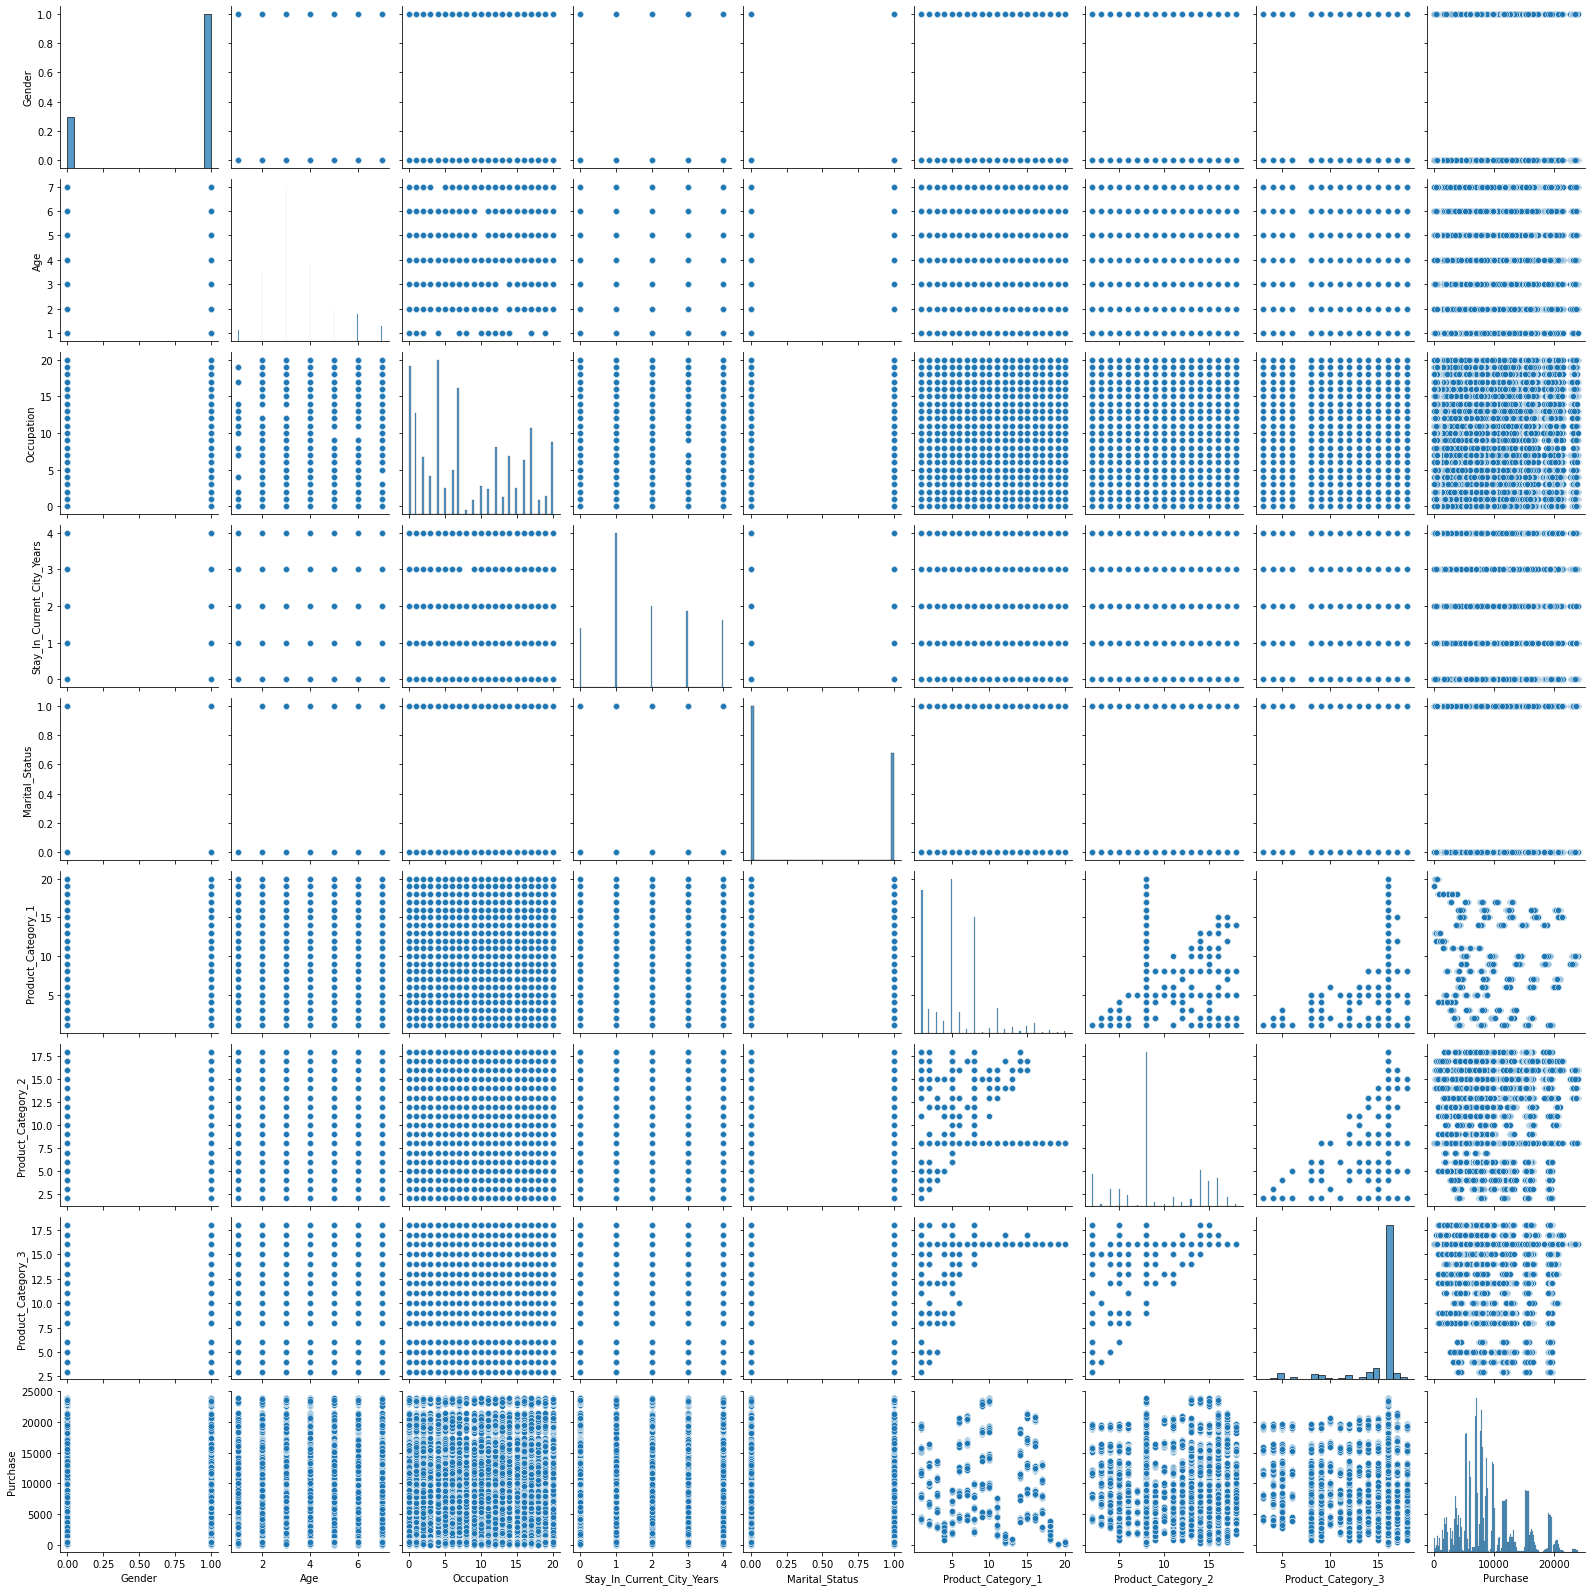

In [81]:
sns.pairplot(dff)

C:\Users\spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age', ylabel='Purchase'>

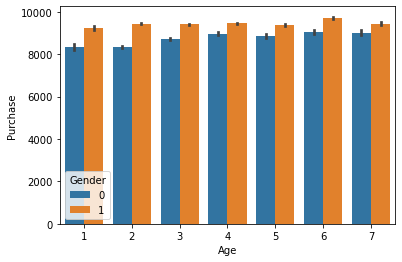

In [84]:
sns.barplot('Age', 'Purchase', hue="Gender", data=dff)

C:\Users\spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Occupation', ylabel='Purchase'>

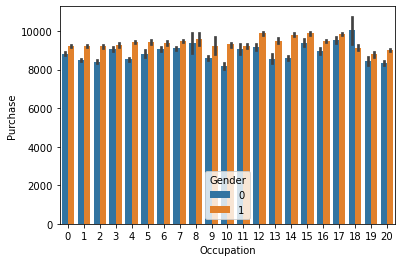

In [85]:
sns.barplot('Occupation', 'Purchase', hue="Gender", data=dff)

C:\Users\spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_1', ylabel='Purchase'>

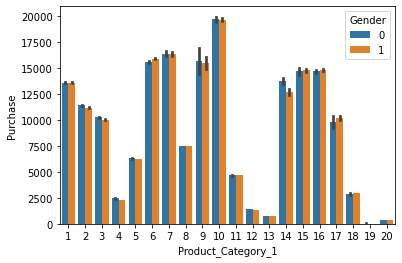

In [87]:
sns.barplot('Product_Category_1', 'Purchase', hue="Gender", data=dff)

C:\Users\spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_2', ylabel='Purchase'>

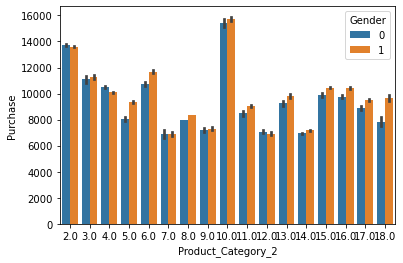

In [88]:
sns.barplot('Product_Category_2', 'Purchase', hue="Gender", data=dff)

C:\Users\spand\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Product_Category_3', ylabel='Purchase'>

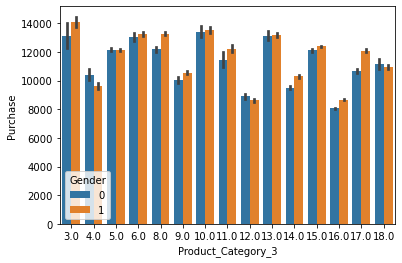

In [89]:
sns.barplot('Product_Category_3', 'Purchase', hue="Gender", data=dff)

In [90]:
dff

,Product_ID,Gender,Age,Occupation,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,P00069042,0,1,10,2,0,3,8.0,16.0,8370.0
1,P00248942,0,1,10,2,0,1,6.0,14.0,15200.0
2,P00087842,0,1,10,2,0,12,8.0,16.0,1422.0
3,P00085442,0,1,10,2,0,12,14.0,16.0,1057.0
4,P00285442,1,7,16,4,0,8,8.0,16.0,7969.0
...,...,...,...,...,...,...,...,...,...,...
783662,P00118942,0,3,15,4,1,8,8.0,16.0,NaN
783663,P00254642,0,3,15,4,1,5,8.0,16.0,NaN
783664,P00031842,0,3,15,4,1,1,5.0,12.0,NaN
783665,P00124742,0,5,1,4,0,10,16.0,16.0,NaN
